# Jupyter notebook example

USGS Scientists often produce one-off analyses that become part of larger "stories". However, the data and code from these oneoff products often cannot be used for other projects unless the users is an expert in the subject field. Interactive products such as Jupyter notebooks could be used to highlight key findings and help others intereste in these products find them and learn how to use them. 

For this example, we examine eDNA data generated as part of sea lamprey monitoring research. 

First, we read in our data from Science Base. We print the `head()` of the data to peak at it and print the `shape` to see how many rows and columns we have. 

In [15]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import re

url = "https://www.sciencebase.gov/catalog/file/get/59b6cc06e4b08b1644ddf8b3?f=__disk__f7%2F19%2F08%2Ff719084d841c0419e3a7f9a747c156406e32a85b"
s = requests.get(url).content
dat = pd.read_csv(io.StringIO(s.decode('utf-8')))
print(dat.head())
print(dat.shape)

    Sample Fluor     Copies Inhibited
0  200L-2A   FAM  1336000.0        NO
1  200L-2B   FAM  1099000.0        NO
2  200L-2C   FAM  1229000.0        NO
3  200L-3A   FAM  1827000.0        NO
4  200L-3B   FAM  1758000.0        NO
(352, 4)


Then, we might filter our data and do other cleanup steps.

In [16]:
dat[['Stock_level', 'Sample_ID', 'date']] = dat['Sample'].apply(lambda x: pd.Series(str(x).split('-')))
FAM = dat[dat["Fluor"] == "FAM"]
copies_to_keep = ["0L", "2L", "20L", "200L"] 
FAM = FAM[FAM["Stock_level"].isin(copies_to_keep)]
FAM["Stock_level"] = FAM["Stock_level"].astype('category')
FAM["Stock_level"] = FAM["Stock_level"].cat.reorder_categories(copies_to_keep, ordered=True)
FAM["Copies_log10"] = np.log10(FAM["Copies"] + 1)
FAM['Sample_replicate'] = FAM['Sample'].str.replace("(\\d+L)-(\\d)([A-Z])", "\\1\\2", regex = True)
print(FAM.head())
print(FAM.shape)

    Sample Fluor     Copies Inhibited Stock_level Sample_ID date  \
0  200L-2A   FAM  1336000.0        NO        200L        2A  NaN   
1  200L-2B   FAM  1099000.0        NO        200L        2B  NaN   
2  200L-2C   FAM  1229000.0        NO        200L        2C  NaN   
3  200L-3A   FAM  1827000.0        NO        200L        3A  NaN   
4  200L-3B   FAM  1758000.0        NO        200L        3B  NaN   

   Copies_log10 Sample_replicate  
0      6.125807            200L2  
1      6.040998            200L2  
2      6.089552            200L2  
3      6.261739            200L3  
4      6.245019            200L3  
(144, 9)


Next, we might plot our data and run other analyses.

In this case, we first plot our data using a boxplot. 

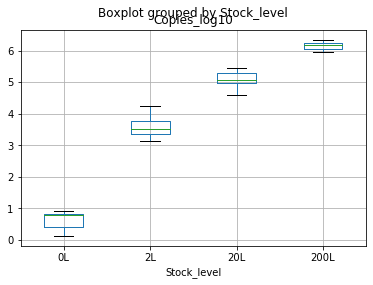

In [17]:
FAM.boxplot(column = "Copies_log10", by ="Stock_level")

In the above example, see how stocking-level increases the amount of eDNA detected in water. 

Originally, a mixed-effect model was run on this code. However, I cannot figure out how to run this so I ran a linear model instead. 
This confirms plot shown above. 

In [19]:
md = smf.ols( "Copies_log10 ~ Stock_level", FAM)
md = md.fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:           Copies_log10   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2089.
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          4.68e-102
Time:                        19:05:24   Log-Likelihood:                 2.2592
No. Observations:                 122   AIC:                             3.482
Df Residuals:                     118   BIC:                             14.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6184    

**Note: My origial code and analysis were done in R and included both better figures and more analysis. Think of this notebook as a proof of concent.**